In [28]:
import yfinance as yf
import numpy as np
import pandas as pd

# Value at risk (VAR)

In [29]:
ticker_symbol = 'DB1.DE'

In [30]:
stock_data = yf.download(ticker_symbol, start='2023-05-11', end='2024-05-11')

[*********************100%***********************]  1 of 1 completed


In [31]:
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

In [32]:
stock_returns = stock_data['Daily Return'].dropna()

In [33]:
confidence_level = 0.95

In [34]:
var = np.percentile(stock_returns, 100 * (1 - confidence_level))

In [35]:
initial_investment = 20000
var_amount = initial_investment * var

In [36]:
print(f"Value at Risk (VaR) at {confidence_level*100:.0f}% confidence level:")
print(f"{var_amount:.2f} EUR")

Value at Risk (VaR) at 95% confidence level:
-316.04 EUR


<IPython.core.display.Javascript object>


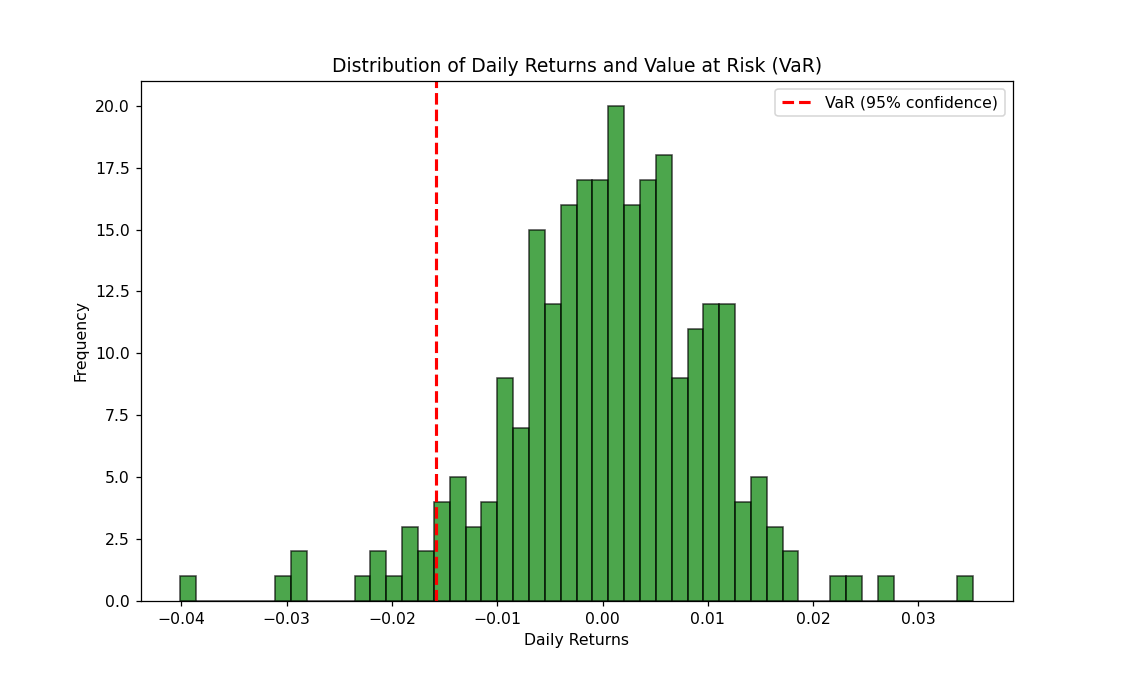

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(stock_returns, bins=50, alpha=0.7, color='g', edgecolor='k')
plt.axvline(x=var, color='r', linestyle='--', linewidth=2, label=f"VaR ({confidence_level*100:.0f}% confidence)")
plt.title('Distribution of Daily Returns and Value at Risk (VaR)')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Beta Calculation

In [39]:
import pandas as pd
import numpy as np
import yfinance as yf


stock_ticker = 'DB1.DE'
index_ticker = '^GDAXI'

start_date = '2023-05-11'
end_date = '2024-05-11' 

stock_data = yf.download(stock_ticker, start=start_date, end=end_date)
index_data = yf.download(index_ticker, start=start_date, end=end_date)
stock_returns = stock_data['Adj Close'].pct_change().dropna()
index_returns = index_data['Adj Close'].pct_change().dropna()


covariance = np.cov(stock_returns, index_returns)[0, 1]
variance = np.var(index_returns)


beta = covariance / variance
print(f"Beta for {stock_ticker} relative to {index_ticker}: {beta:.2f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Beta for DB1.DE relative to ^GDAXI: 0.68


# Monte Carlo Simulation

In [40]:
stock_data = yf.download(stock_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [41]:
stock_data['Log_Return'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))

In [42]:
num_simulations = 1000 
forecast_days = 252 

In [43]:
mu = stock_data['Log_Return'].mean()
sigma = stock_data['Log_Return'].std()

<IPython.core.display.Javascript object>


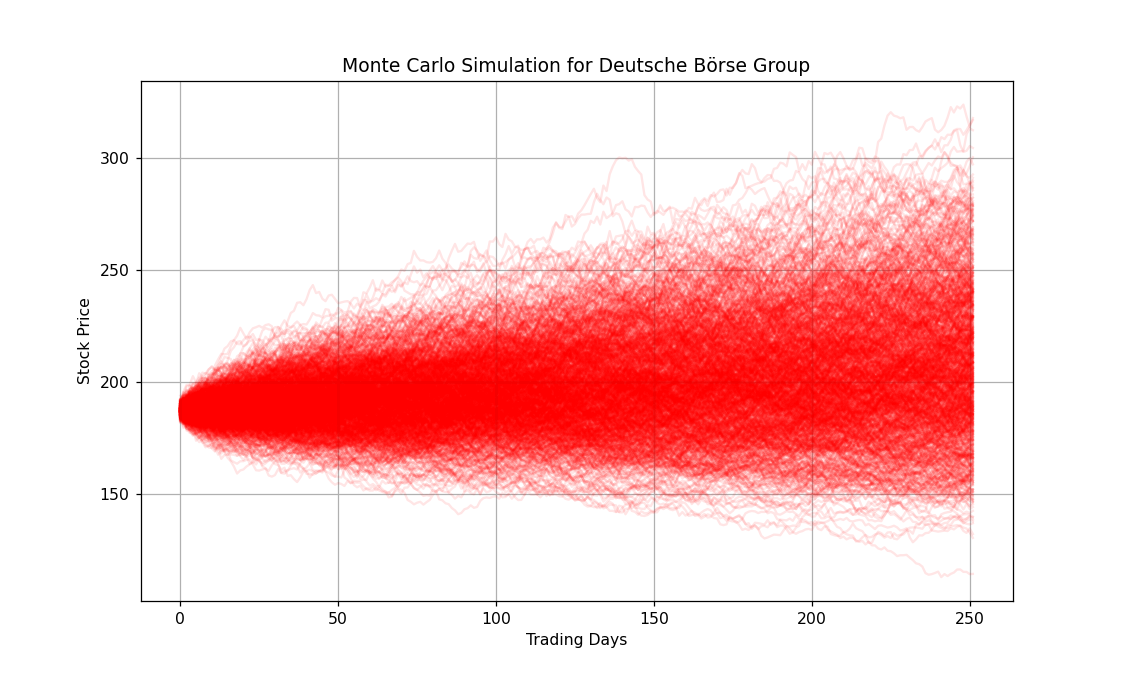

In [55]:
simulated_prices = np.zeros((forecast_days, num_simulations))

# Setting the initial stock price as the last observed closing price
last_price = stock_data['Adj Close'][-1]

# Performing Monte Carlo simulation
for i in range(num_simulations):
    # Generating random shocks (returns) based on normal distribution
    daily_returns = np.random.normal(mu, sigma, forecast_days)
    
    # Calculating price path using the random shocks
    price_path = np.exp(np.log(last_price) + np.cumsum(daily_returns))
    
    # Storing price path in the simulated prices array
    simulated_prices[:, i] = price_path

# Ploting the simulated price paths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(simulated_prices, color='red', alpha=0.1)
plt.title('Monte Carlo Simulation for Deutsche Börse Group')
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Tracking error

In [21]:
portfolio_ticker = 'DB1.DE'
benchmark_ticker = '^GDAXI' 


In [22]:
portfolio_data = yf.download(portfolio_ticker, start=start_date, end=end_date)['Adj Close']
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
portfolio_returns = portfolio_data.pct_change()
benchmark_returns = benchmark_data.pct_change()


In [24]:
portfolio_returns = portfolio_returns.dropna()
benchmark_returns = benchmark_returns.loc[portfolio_returns.index]
difference_returns = portfolio_returns - benchmark_returns
tracking_error = difference_returns.std()
print(f"Tracking Error (annualized): {tracking_error * 100:.2f}%")

Tracking Error (annualized): 1.01%


# Sharpe Ratio

In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
stock_data = yf.download("DB1.DE", start="2023-05-11", end="2024-05-11")
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
# Risk-free Rate (e.g., 10-year US Treasury yield)
risk_free_rate = 0.01  # Example risk-free rate of 1%
stock_data['Excess Returns'] = stock_data['Returns'] - risk_free_rate
sharpe_ratio = stock_data['Excess Returns'].mean() / stock_data['Excess Returns'].std()

print("Sharpe Ratio:", sharpe_ratio)


[*********************100%***********************]  1 of 1 completed
Sharpe Ratio: -0.9800382674741929


# Treyner Ratio

In [57]:
import yfinance as yf
import pandas as pd
import numpy as np

#Historical stock price data for Deutsche Börse AG
stock_data = yf.download("DB1.DE", start="2023-05-11", end="2024-05-11")
# Calculate Daily Returns
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
# Risk-free Rate (e.g., 10-year US Treasury yield)
risk_free_rate = 0.01 
market_data = yf.download("^GDAXI", start="2023-05-11", end="2024-05-11")
market_returns = market_data['Adj Close'].pct_change()
covariance = np.cov(stock_data['Returns'].dropna(), market_returns.dropna())[0][1]
market_variance = np.var(market_returns.dropna())
beta = covariance / market_variance
stock_data['Excess Returns'] = stock_data['Returns'] - risk_free_rate
treynor_ratio = (stock_data['Excess Returns'].mean() / beta)

print("Treynor Ratio:", treynor_ratio)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Treynor Ratio: -0.014106703994196126


# Sensitivity Analysis

In [5]:
def calculate_npv(revenue_growth_rate, discount_rate, terminal_growth_rate, terminal_value):
    # Calculate cash flows (hypothetical example)
    cash_flows = [1000000 * (1 + revenue_growth_rate)**t for t in range(1, 6)]
    cash_flows.append(terminal_value)
    
    # Calculate NPV
    npv = 0
    for t, cash_flow in enumerate(cash_flows):
        npv += cash_flow / (1 + discount_rate)**(t+1)
    
    return npv

def sensitivity_analysis():
    sensitivity_results = {}
    # Define ranges for input parameters
    revenue_growth_rate_range = [0.02, 0.04, 0.06]  # Example revenue growth rate range
    discount_rate_range = [0.08, 0.10, 0.12]  # Example discount rate range
    terminal_growth_rate_range = [0.02, 0.04, 0.06]  # Example terminal growth rate range
    terminal_value = 10000000  # Example terminal value
    
    # Perform sensitivity analysis
    for rgr in revenue_growth_rate_range:
        for dr in discount_rate_range:
            for tgr in terminal_growth_rate_range:
                npv = calculate_npv(rgr, dr, tgr, terminal_value)
                sensitivity_results[(rgr, dr, tgr)] = npv
    
    return sensitivity_results

# Perform sensitivity analysis
results = sensitivity_analysis()

# Print sensitivity analysis results
for params, npv in results.items():
    print(f"Parameters: {params}, NPV: {npv}")

    

Parameters: (0.02, 0.08, 0.02), NPV: 10527575.940798394
Parameters: (0.02, 0.08, 0.04), NPV: 10527575.940798394
Parameters: (0.02, 0.08, 0.06), NPV: 10527575.940798394
Parameters: (0.02, 0.1, 0.02), NPV: 9654011.058676496
Parameters: (0.02, 0.1, 0.04), NPV: 9654011.058676496
Parameters: (0.02, 0.1, 0.06), NPV: 9654011.058676496
Parameters: (0.02, 0.12, 0.02), NPV: 8876163.20585898
Parameters: (0.02, 0.12, 0.04), NPV: 8876163.20585898
Parameters: (0.02, 0.12, 0.06), NPV: 8876163.20585898
Parameters: (0.04, 0.08, 0.02), NPV: 10772824.696940586
Parameters: (0.04, 0.08, 0.04), NPV: 10772824.696940586
Parameters: (0.04, 0.08, 0.06), NPV: 10772824.696940586
Parameters: (0.04, 0.1, 0.02), NPV: 9883679.982930306
Parameters: (0.04, 0.1, 0.04), NPV: 9883679.982930306
Parameters: (0.04, 0.1, 0.06), NPV: 9883679.982930306
Parameters: (0.04, 0.12, 0.02), NPV: 9091611.309946585
Parameters: (0.04, 0.12, 0.04), NPV: 9091611.309946585
Parameters: (0.04, 0.12, 0.06), NPV: 9091611.309946585
Parameters: (

# Backtesting

In [47]:
import yfinance as yf
import pandas as pd
import numpy as np

#Historical stock price data for Deutsche Börse AG (DB1.DE)
data = yf.download("DB1.DE", start="2023-05-11", end="2024-05-11")

# Define the moving average crossover strategy
def moving_average_crossover_strategy(data, short_window=50, long_window=200):
    # Calculate short-term and long-term moving averages
    data['Short_MA'] = data['Adj Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Adj Close'].rolling(window=long_window, min_periods=1).mean()
    
    # Generate signals
    data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, 0)
    data['Position'] = data['Signal'].diff()
    
    # Calculate returns
    data['Returns'] = data['Adj Close'].pct_change()
    data['Strategy_Returns'] = data['Position'].shift(1) * data['Returns']
    
    return data

# Apply the strategy
backtest_data = moving_average_crossover_strategy(data)

# Calculate cumulative returns
backtest_data['Cumulative_Returns'] = (1 + backtest_data['Strategy_Returns']).cumprod()

# Plot cumulative returns
backtest_data['Cumulative_Returns'].plot(figsize=(10, 6), title='Moving Average Crossover Strategy Backtest')


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Moving Average Crossover Strategy Backtest'}, xlabel='Date'>

<IPython.core.display.Javascript object>


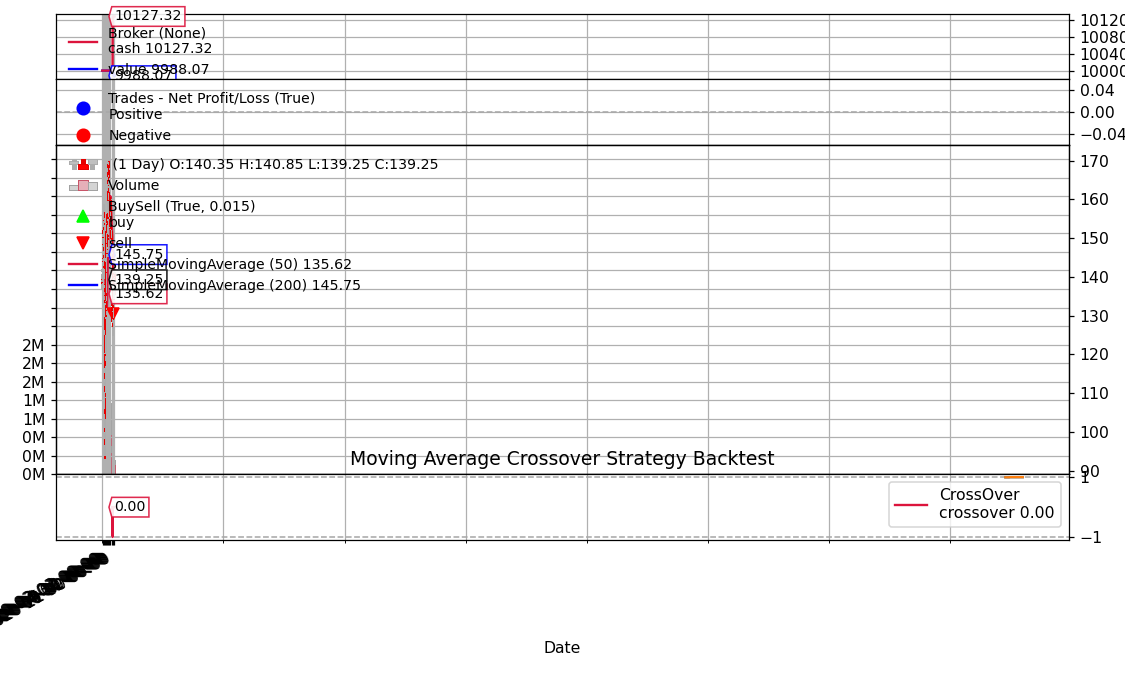

<IPython.core.display.Javascript object>


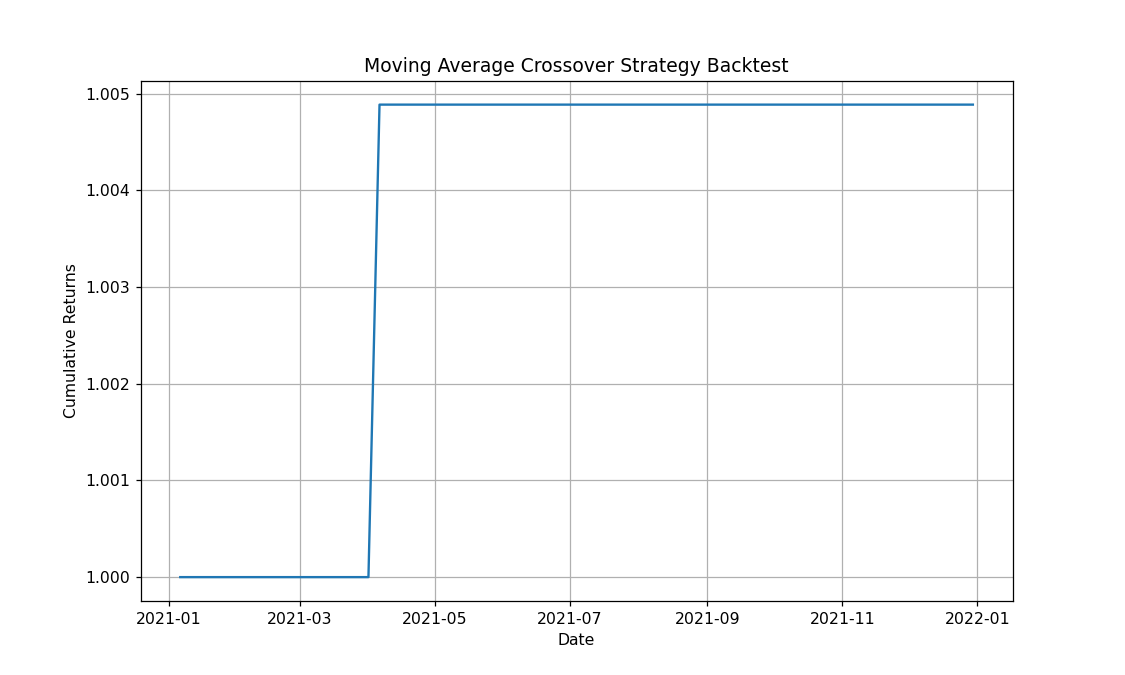

In [8]:
import matplotlib.pyplot as plt

# Apply the strategy
backtest_data = moving_average_crossover_strategy(data)

# Calculate cumulative returns
backtest_data['Cumulative_Returns'] = (1 + backtest_data['Strategy_Returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(backtest_data.index, backtest_data['Cumulative_Returns'])
plt.title('Moving Average Crossover Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


# Conditional Var (CVAR)

In [58]:
import yfinance as yf
import numpy as np

#Historical price data for Deutsche Börse AG
data = yf.download("DB1.DE", start="2023-04-11", end="2024-05-11")
#Calculating daily returns
data['Returns'] = data['Adj Close'].pct_change()
#Determining threshold (e.g., 5%)
threshold = 0.05
#Sorting returns
sorted_returns = np.sort(data['Returns'].dropna())
#Calculating VaR
index = int(len(sorted_returns) * threshold)
VaR = sorted_returns[index]
#Calculating CVaR
CVaR = sorted_returns[:index].mean()

print("Conditional Value at Risk (CVaR) at 5% confidence level:", CVaR)


[*********************100%***********************]  1 of 1 completed
Conditional Value at Risk (CVaR) at 5% confidence level: -0.02768599783870259


# Volatility Skew

In [59]:
import yfinance as yf
import numpy as np

#Historical price data for Deutsche Börse AG
data = yf.download("DB1.DE", start="2020-05-11", end="2024-05-11")

# Defining a function to calculate implied volatility from option prices (placeholder implementation)
def calculate_implied_volatility(strike_price, expiration_date):
    # Placeholder implementation - replace with your actual implementation
    return np.random.uniform(0.1, 0.5)  # Example: Return a random implied volatility within a range

# Calculating implied volatility for different strike prices and the same expiration date
strike_prices = [150, 160, 170, 180, 190]  # Example strike prices
expiration_date = "2025-01-01"  # Example expiration date

implied_volatilities = []
for strike_price in strike_prices:
    # Calculating implied volatility for each strike price and expiration date
    implied_volatility = calculate_implied_volatility(strike_price, expiration_date)
    implied_volatilities.append(implied_volatility)

# Calculating the volatility skew
volatility_skew = np.diff(implied_volatilities)

print("Volatility Skew:", volatility_skew)


[*********************100%***********************]  1 of 1 completed
Volatility Skew: [-0.25420251  0.38330654 -0.07445615 -0.05003395]


<IPython.core.display.Javascript object>


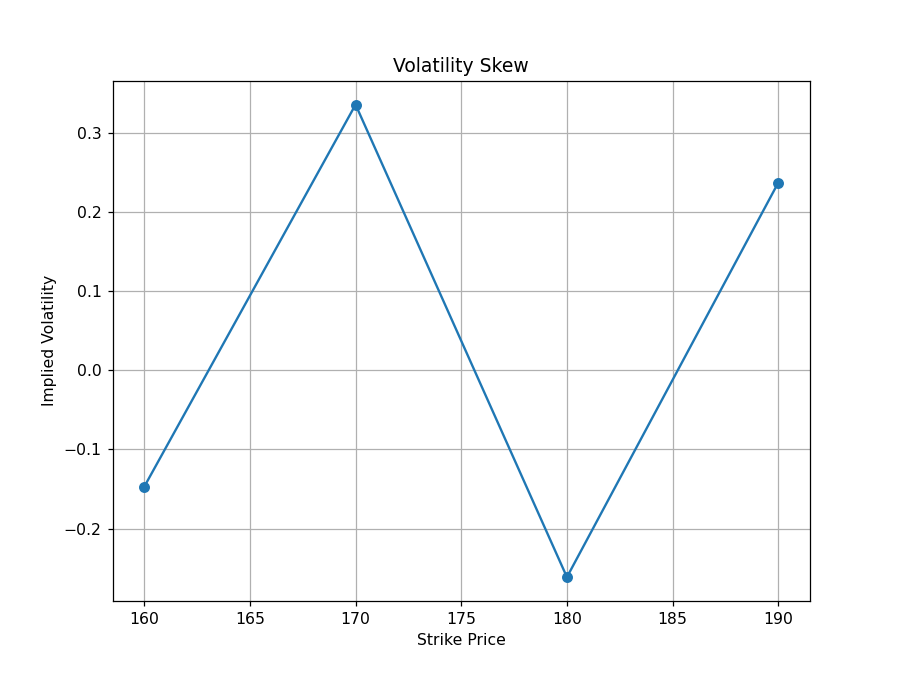

In [62]:
import matplotlib.pyplot as plt

# Strike prices
strike_prices = [150, 160, 170, 180, 190]

# Implied volatilities
volatility_skew = [-0.14725995, 0.33595083, -0.26144809, 0.2373325]

# Plot the volatility skew
plt.figure(figsize=(8, 6))
plt.plot(strike_prices[1:], volatility_skew, marker='o', linestyle='-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Skew')
plt.grid(True)
plt.show()



# Jensen's Alpha and M-squared

In [61]:
import yfinance as yf
import numpy as np
from scipy import stats

#Historical price data for Deutsche Börse AG and the market index (e.g., DAX)
db1_data = yf.download("DB1.DE", start="2023-04-11", end="2024-05-11")
index_data = yf.download("^GDAXI", start="2023-04-11", end="2024-05-11")

# Calculating daily returns
db1_returns = db1_data['Adj Close'].pct_change()
index_returns = index_data['Adj Close'].pct_change()

# Removing NaN values
db1_returns = db1_returns.dropna()
index_returns = index_returns.dropna()

# Estimating market model (CAPM)
slope, intercept, r_value, p_value, std_err = stats.linregress(index_returns, db1_returns)

# Calculating expected return using the market model
expected_return = intercept + slope * index_returns

# Calculating Jensen's Alpha
jensens_alpha = db1_returns - expected_return

# Calculating Sharpe ratio for Deutsche Börse AG
risk_free_rate = 0.02  # Example risk-free rate
daily_rf_rate = (1 + risk_free_rate) ** (1/365) - 1
db1_volatility = db1_returns.std()
sharpe_ratio = (db1_returns.mean() - daily_rf_rate) / db1_volatility

# Calculating M^2 (M-squared)
tracking_error = np.sqrt(((db1_returns - index_returns) ** 2).mean())
m_squared = sharpe_ratio ** 2 * tracking_error ** 2

print("Jensen's Alpha:", jensens_alpha.mean())
print("M^2 (M-squared):", m_squared)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Jensen's Alpha: -1.5398813464286876e-19
M^2 (M-squared): 3.1363637097981524e-08


# Garch Models

[*********************100%***********************]  1 of 1 completed


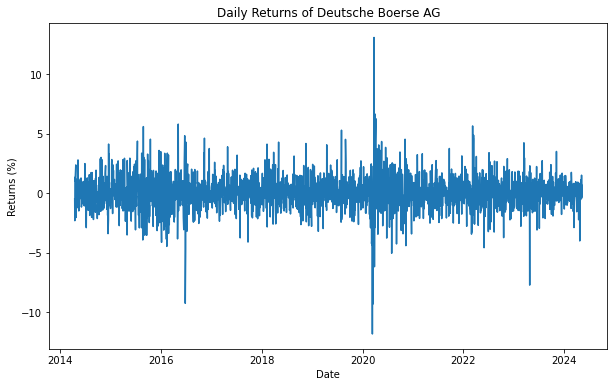

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4315.89
Distribution:                  Normal   AIC:                           8639.79
Method:            Maximum Likelihood   BIC:                           8663.18
                                        No. Observations:                 2559
Date:                Tue, May 14 2024   Df Residuals:                     2558
Time:                        23:45:22   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0749  2.505e-02      2.988  2.808e-03 [2.576e-0

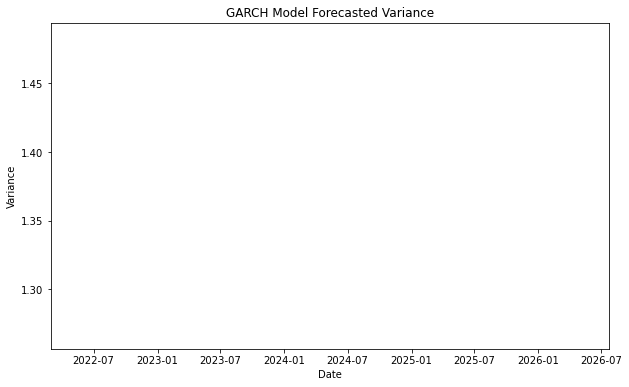

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model


ticker = 'DB1.DE'
data = yf.download(ticker, start='2014-04-11', end='2024-05-11')

# Calculating daily returns
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Rescaling returns
data['Returns'] = data['Returns'] * 100

# Visualizing the data
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'])
plt.title('Daily Returns of Deutsche Boerse AG')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.show()

# Droping NaN values from returns
returns = data['Returns'].dropna()

# Defining and fitting the GARCH model
model = arch_model(returns, vol='Garch', p=1, q=1, rescale=True)
garch_fit = model.fit(disp='off')

# Printing the model summary
print(garch_fit.summary())

# Forecasting
forecast_horizon = 5
garch_forecast = garch_fit.forecast(horizon=forecast_horizon, reindex=False)

# Extracting forecasted values
mean_forecast = garch_forecast.mean.iloc[-1].values
variance_forecast = garch_forecast.variance.iloc[-1].values

print("Mean forecast:", mean_forecast)
print("Variance forecast:", variance_forecast)

# Plotting the forecasted variance
plt.figure(figsize=(10, 6))
plt.plot(garch_forecast.variance[-forecast_horizon:])
plt.title('GARCH Model Forecasted Variance')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.show()



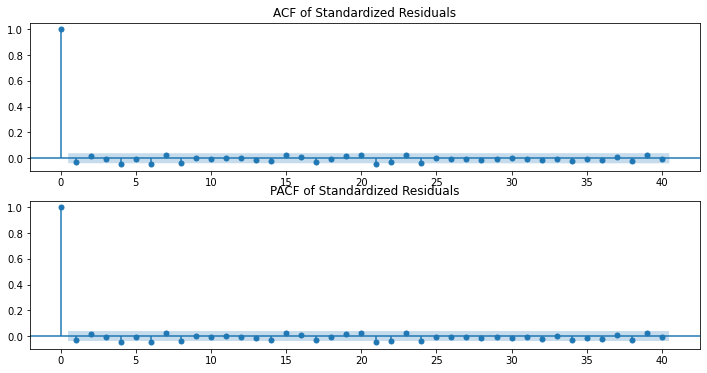

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Standardized residuals
std_resid = garch_fit.resid / garch_fit.conditional_volatility

# ACF and PACF plots of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(std_resid, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(2, 1, 2)
plot_pacf(std_resid, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()
